In [15]:
# basic stuff 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# from google.colab import files
import os
import sklearn
import time
import math
import itertools

# torch stuff
import torch
from torch import nn
import torch.nn.functional as F

# !pip install mat73
# import mat73

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import sys
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/PopFRData/')
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/xds_python/')
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/custom_functions/')

from xds import lab_data
import joint_angles
import data_loading
import train_test
import r2_pr2
import pr2
import models
from models import TempConvNet, FCNet
import visualization

In [80]:
import importlib
import visualization

importlib.reload(visualization)

<module 'visualization' from '/content/drive/MyDrive/Miller_Lab/FIU/custom_functions/visualization.py'>

# Data

In [ ]:
tcnn_dataset_dict_split = data_loading.load_datasets('/content/drive/My Drive/Miller_Lab/FIU/PopFRData/tcnn_processed_shuffled_opensim_datasets_splitneurons/instance_length_100/fullyrestrained/',split_neurons = True)
tcnn_loader_dict_split = data_loading.get_loaders(tcnn_dataset_dict_split, 32,split_neurons = True)

In [ ]:
dataset_dict_split = data_loading.load_datasets('/content/drive/My Drive/Miller_Lab/FIU/PopFRData/processed_shuffled_opensim_datasets_splitneurons/fullyrestrained/',split_neurons = True)
loader_dict_split = data_loading.get_loaders(dataset_dict_split, 32,split_neurons = True)

MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 131139
Epoch: 000, LR: 0.001000, Train Loss: 219.099903, Test Loss: 150.182911. Train R2: -0.1917489, Test R2: -0.2001298, Train pR2: -3.3526108, Test pR2: -3.4758289
Epoch: 050, LR: 0.000800, Train Loss: 77.741072, Test Loss: 87.503843. Train R2: 0.3787072, Test R2: 0.3000732, Train pR2: 0.1068557, Test pR2: -0.0127553
Epoch: 100, LR: 0.000262, Train Loss: 71.990534, Test Loss: 87.691036. Train R2: 0.4153723, Test R2: 0.2987401, Train pR2: 0.1281052, Test pR2: -0.0552735
Time to train model: 53.22323942184448


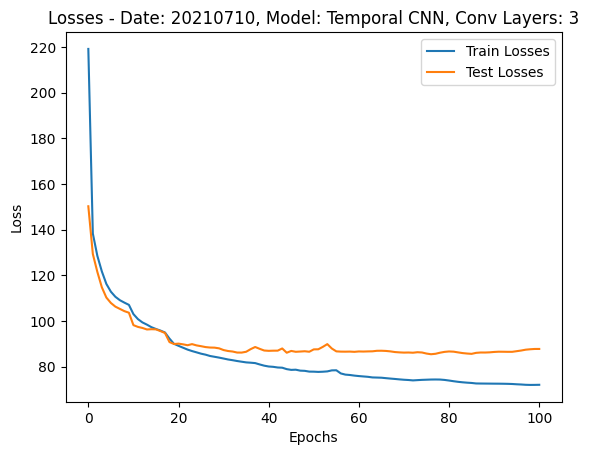

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210710/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 131139
Epoch: 000, LR: 0.001000, Train Loss: 159.124914, Test Loss: 113.251835. Train R2: -0.3155590, Test R2: -0.3438328, Train pR2: -5.6804919, Test pR2: -5.5484223
Epoch: 050, LR: 0.000800, Train Loss: 58.030610, Test Loss: 66.946541. Train R2: 0.3372316, Test R2: 0.2004618, Train pR2: -0.2938158, Test pR2: -0.7980406
Epoch: 100, LR: 0.000210, Train Loss: 53.191581, Test Loss: 67.414273. Train R2: 0.3887914, Test R2: 0.1980123, Train pR2: -0.0978170, Test pR2: -0.6739354
Time to train model: 52.68773078918457


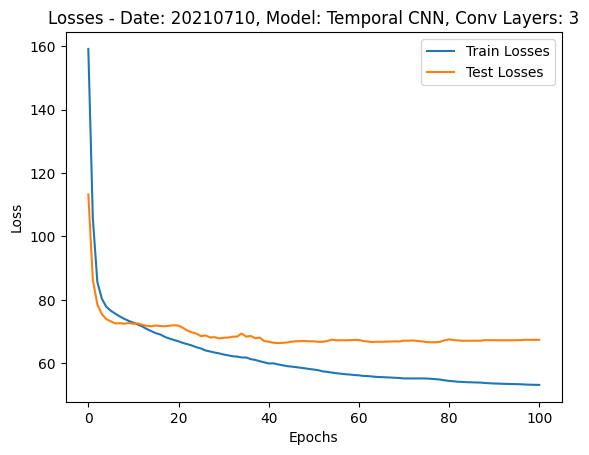

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210710/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 131139
Epoch: 000, LR: 0.001000, Train Loss: 267.153743, Test Loss: 187.704929. Train R2: -0.6058437, Test R2: -0.6533158, Train pR2: -11.3564157, Test pR2: -11.5449162
Epoch: 050, LR: 0.000800, Train Loss: 65.783108, Test Loss: 76.917379. Train R2: 0.4781742, Test R2: 0.3195975, Train pR2: -0.8348444, Test pR2: -0.9429377
Epoch: 100, LR: 0.000262, Train Loss: 58.427344, Test Loss: 75.614917. Train R2: 0.5312811, Test R2: 0.3301960, Train pR2: -0.7556770, Test pR2: -0.9429128
Time to train model: 53.110432863235474


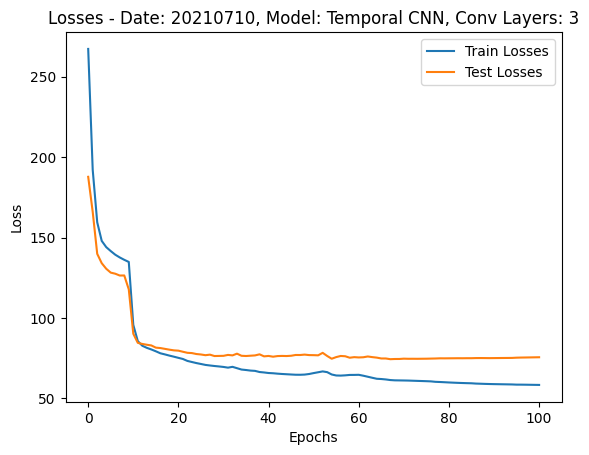

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210710/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128437
Epoch: 000, LR: 0.001000, Train Loss: 311.625565, Test Loss: 179.230326. Train R2: -0.2335641, Test R2: -0.2168026, Train pR2: -4.2763143, Test pR2: -4.2151279
Epoch: 050, LR: 0.001000, Train Loss: 70.405830, Test Loss: 77.612389. Train R2: 0.5440581, Test R2: 0.4771546, Train pR2: -2.1067138, Test pR2: -2.2149782
Epoch: 100, LR: 0.000512, Train Loss: 60.934470, Test Loss: 76.453659. Train R2: 0.6022038, Test R2: 0.4855664, Train pR2: -1.0697082, Test pR2: -1.1549450
Time to train model: 33.77232217788696


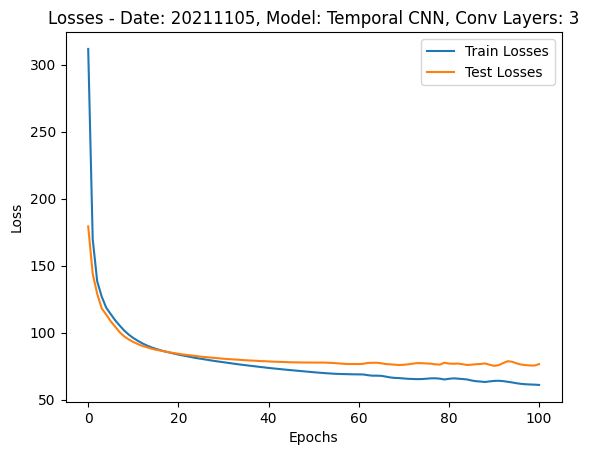

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20211105/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128437
Epoch: 000, LR: 0.001000, Train Loss: 215.204678, Test Loss: 125.715579. Train R2: -0.4299366, Test R2: -0.4563334, Train pR2: -1.9456253, Test pR2: -2.0225918
Epoch: 050, LR: 0.000800, Train Loss: 49.537935, Test Loss: 55.427803. Train R2: 0.4404503, Test R2: 0.3584231, Train pR2: -0.8300078, Test pR2: -0.9392031
Epoch: 100, LR: 0.000512, Train Loss: 44.002270, Test Loss: 54.319394. Train R2: 0.5028513, Test R2: 0.3690097, Train pR2: -0.7649513, Test pR2: -0.9450549
Time to train model: 33.933300733566284


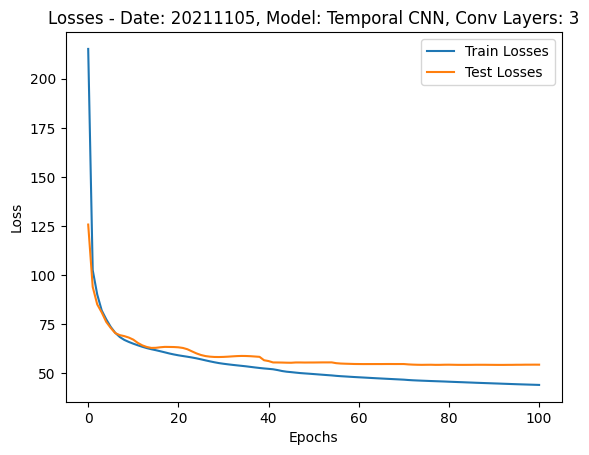

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20211105/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 128823
Epoch: 000, LR: 0.001000, Train Loss: 223.506845, Test Loss: 102.053406. Train R2: -0.1039935, Test R2: -0.1138722, Train pR2: -1.7193912, Test pR2: -1.7170267
Epoch: 050, LR: 0.001000, Train Loss: 55.161099, Test Loss: 62.951001. Train R2: 0.4340141, Test R2: 0.3042055, Train pR2: -1.2799405, Test pR2: -1.3283799
Epoch: 100, LR: 0.000800, Train Loss: 49.088673, Test Loss: 61.869490. Train R2: 0.4933110, Test R2: 0.3147367, Train pR2: -1.2332857, Test pR2: -1.3222506
Time to train model: 33.60556721687317


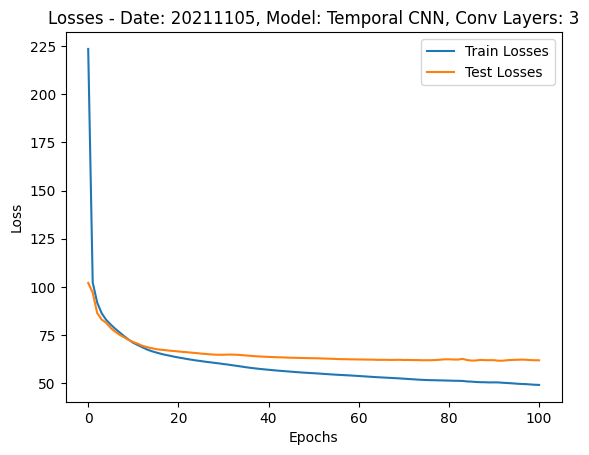

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20211105/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 130367
Epoch: 000, LR: 0.001000, Train Loss: 298.289079, Test Loss: 158.551290. Train R2: -0.3448369, Test R2: -0.3523403, Train pR2: -5.7170625, Test pR2: -6.1341500
Epoch: 050, LR: 0.001000, Train Loss: 83.507545, Test Loss: 86.178256. Train R2: 0.3227625, Test R2: 0.2720793, Train pR2: -3.0795107, Test pR2: -3.3520186
Epoch: 100, LR: 0.000800, Train Loss: 67.419814, Test Loss: 72.889102. Train R2: 0.4533388, Test R2: 0.3821634, Train pR2: -0.1650535, Test pR2: -0.2474156
Time to train model: 35.294759035110474


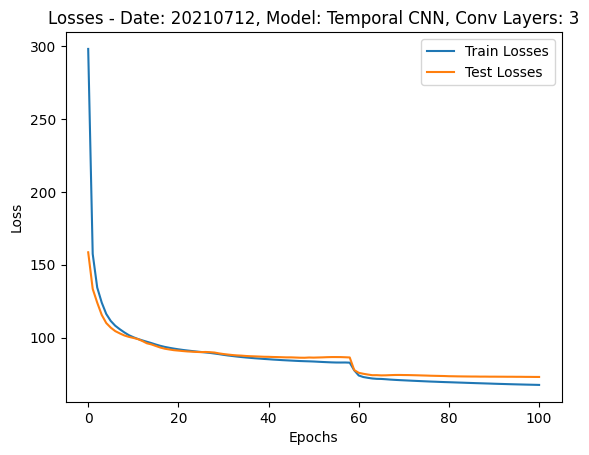

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210712/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 130367
Epoch: 000, LR: 0.001000, Train Loss: 317.734724, Test Loss: 168.723511. Train R2: -0.1599063, Test R2: -0.1664921, Train pR2: -3.0936632, Test pR2: -3.1834593
Epoch: 050, LR: 0.001000, Train Loss: 74.099225, Test Loss: 80.922587. Train R2: 0.4713460, Test R2: 0.4245952, Train pR2: -0.5372976, Test pR2: -0.5762434
Epoch: 100, LR: 0.000640, Train Loss: 66.932922, Test Loss: 78.742884. Train R2: 0.5218441, Test R2: 0.4465203, Train pR2: -0.5298306, Test pR2: -0.6173684
Time to train model: 35.100093364715576


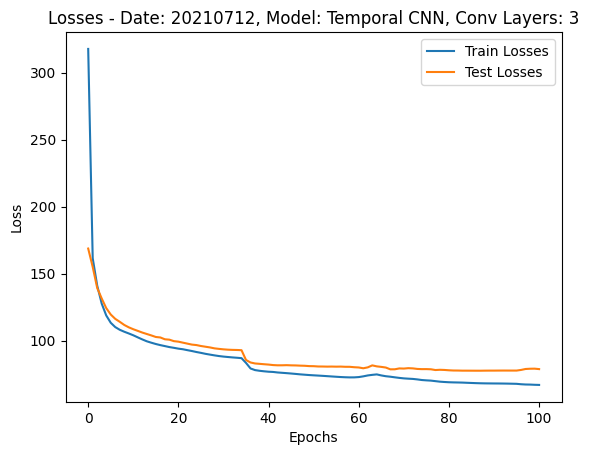

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210712/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 130560
Epoch: 000, LR: 0.001000, Train Loss: 475.149580, Test Loss: 276.751190. Train R2: -0.4255894, Test R2: -0.4746753, Train pR2: -8.5578814, Test pR2: -8.6229467
Epoch: 050, LR: 0.001000, Train Loss: 102.389279, Test Loss: 117.805519. Train R2: 0.4688213, Test R2: 0.3891275, Train pR2: -2.0494993, Test pR2: -2.3064983
Epoch: 100, LR: 0.000800, Train Loss: 83.946420, Test Loss: 102.266749. Train R2: 0.5611883, Test R2: 0.4670779, Train pR2: -0.0064140, Test pR2: -0.0934853
Time to train model: 34.393386363983154


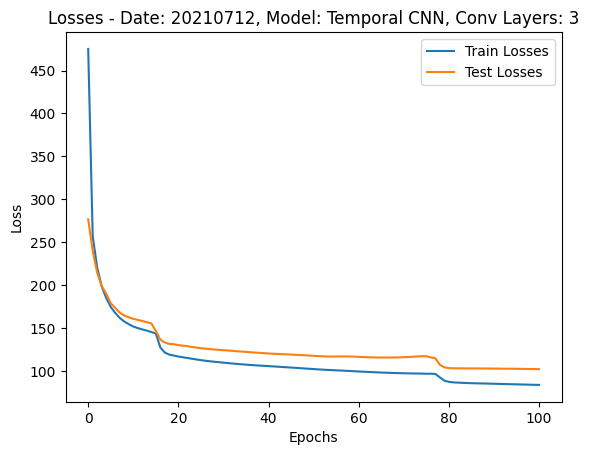

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210712/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 127472
Epoch: 000, LR: 0.001000, Train Loss: 420.221185, Test Loss: 254.052948. Train R2: -1.8681908, Test R2: -1.7979173, Train pR2: -17.8057728, Test pR2: -17.8774185
Epoch: 050, LR: 0.001000, Train Loss: 54.618667, Test Loss: 59.184807. Train R2: 0.4460969, Test R2: 0.3650729, Train pR2: -0.3285086, Test pR2: -0.4282599
Epoch: 100, LR: 0.000328, Train Loss: 49.564062, Test Loss: 59.292252. Train R2: 0.4905742, Test R2: 0.3763997, Train pR2: -0.2993780, Test pR2: -0.4205849
Time to train model: 16.25774884223938


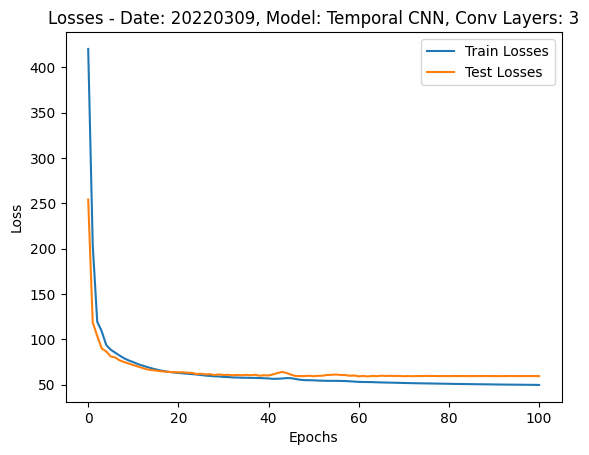

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20220309/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 127472
Epoch: 000, LR: 0.001000, Train Loss: 518.800684, Test Loss: 286.539337. Train R2: -1.1566034, Test R2: -1.1530114, Train pR2: -6.5203772, Test pR2: -6.3266630
Epoch: 050, LR: 0.000800, Train Loss: 62.006838, Test Loss: 83.117996. Train R2: 0.4965118, Test R2: 0.4581775, Train pR2: -0.6703675, Test pR2: -0.7420949
Epoch: 100, LR: 0.000512, Train Loss: 56.136885, Test Loss: 79.641502. Train R2: 0.5438551, Test R2: 0.4729526, Train pR2: -0.6401343, Test pR2: -0.7392051
Time to train model: 16.627299547195435


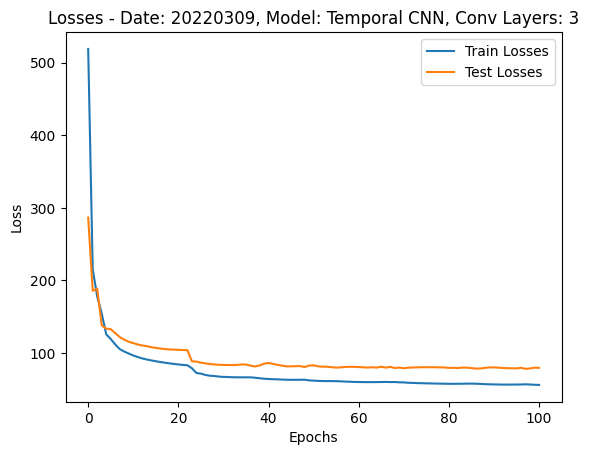

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20220309/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 127472
Epoch: 000, LR: 0.001000, Train Loss: 340.447003, Test Loss: 184.727440. Train R2: -0.7954710, Test R2: -0.8901697, Train pR2: -3.4318891, Test pR2: -3.4980197
Epoch: 050, LR: 0.001000, Train Loss: 56.375133, Test Loss: 69.236603. Train R2: 0.4714067, Test R2: 0.3398229, Train pR2: -0.6018328, Test pR2: -0.7415122
Epoch: 100, LR: 0.000800, Train Loss: 50.081373, Test Loss: 67.437607. Train R2: 0.5262581, Test R2: 0.3384324, Train pR2: -0.0191840, Test pR2: -0.2087377
Time to train model: 19.363362073898315


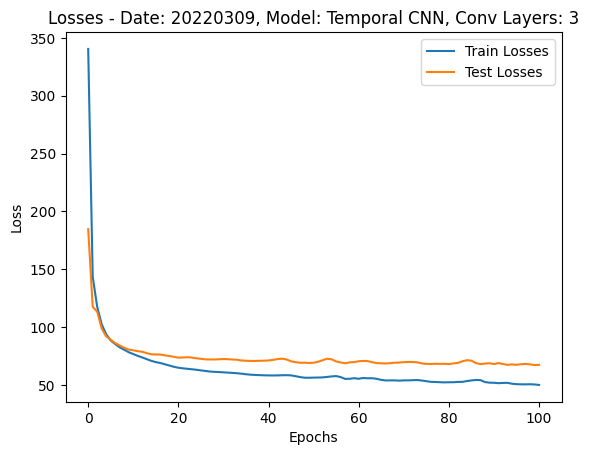

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20220309/2/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 130560
Epoch: 000, LR: 0.001000, Train Loss: 129.871632, Test Loss: 88.853279. Train R2: 0.0069353, Test R2: -0.0140424, Train pR2: -3.0684843, Test pR2: -3.1682138
Epoch: 050, LR: 0.001000, Train Loss: 40.126529, Test Loss: 50.492126. Train R2: 0.5336742, Test R2: 0.4184697, Train pR2: -1.7068768, Test pR2: -2.0541089
Epoch: 100, LR: 0.000640, Train Loss: 34.502163, Test Loss: 49.567412. Train R2: 0.5916542, Test R2: 0.4247784, Train pR2: -1.3894519, Test pR2: -1.8900990
Time to train model: 57.95677900314331


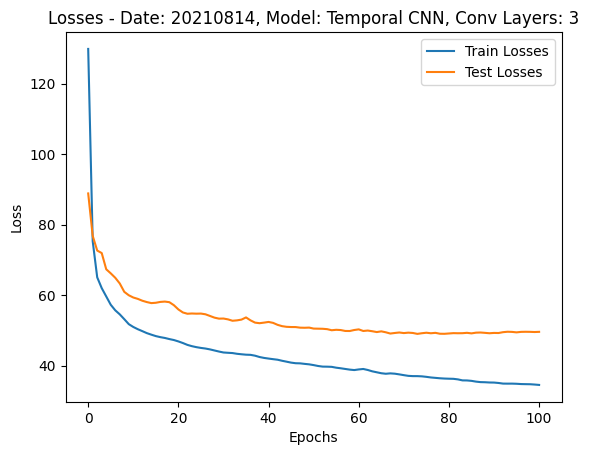

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210814/0/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 130560
Epoch: 000, LR: 0.001000, Train Loss: 272.177533, Test Loss: 206.905411. Train R2: -0.2731448, Test R2: -0.3262382, Train pR2: -4.7433186, Test pR2: -4.7080808
Epoch: 050, LR: 0.001000, Train Loss: 58.463030, Test Loss: 87.104082. Train R2: 0.6193496, Test R2: 0.4358337, Train pR2: -0.0124663, Test pR2: -1.1157757
Epoch: 100, LR: 0.000410, Train Loss: 52.705317, Test Loss: 88.606077. Train R2: 0.6537529, Test R2: 0.4287877, Train pR2: 0.0387450, Test pR2: -1.1390024
Time to train model: 54.544941663742065


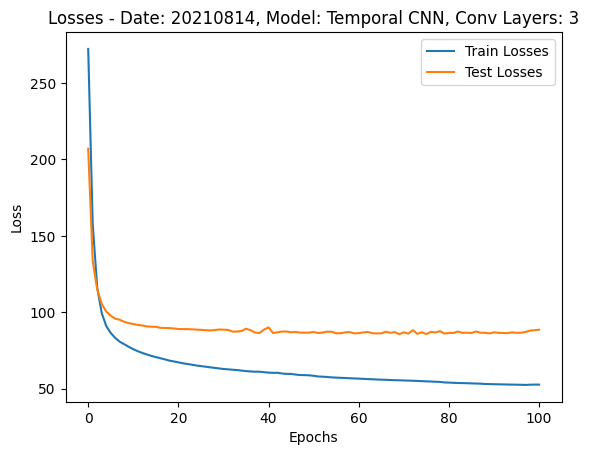

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210814/1/TempCNN_Joint Angles_3_convlayers_reluadded
MSELoss()
Temporal CNN, full dataset
Num Conv Layers: 3, Kernel Size: 5, Total Parameters: 130753
Epoch: 000, LR: 0.001000, Train Loss: 195.430114, Test Loss: 134.800434. Train R2: -0.1567697, Test R2: -0.1641906, Train pR2: -7.5761390, Test pR2: -7.7976136
Epoch: 050, LR: 0.001000, Train Loss: 51.811396, Test Loss: 61.302882. Train R2: 0.5654373, Test R2: 0.4686067, Train pR2: -2.3575075, Test pR2: -2.6751556
Epoch: 100, LR: 0.000512, Train Loss: 46.454543, Test Loss: 61.942750. Train R2: 0.6033894, Test R2: 0.4678272, Train pR2: -1.9762521, Test pR2: -2.3847923
Time to train model: 55.82984519004822


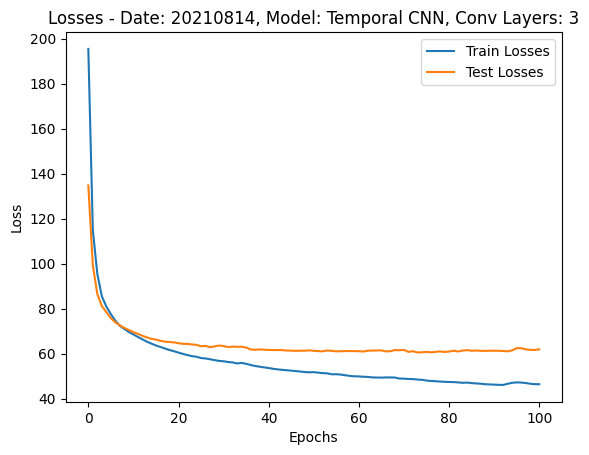

/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/SplitNeurons/instance_length_100/mse_loss/fullyrestrained/20210814/2/TempCNN_Joint Angles_3_convlayers_reluadded


In [ ]:
tcn_models_dict = {}
for date in tcnn_dataset_dict_split.keys():
    tcn_models_dict[date] = {}
    for split_num in ['0','1','2']:
        model = visualization.plot_losses_TempCNN(tcnn_dataset_dict_split[date]['Joint Angles'][split_num]['Full'],
                                                  tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Train'],
                                                  tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Test'],
                                                  0.001, 3, add_relu = True, causal = True, adapt_lr = True, save = True,
                                                  numepochs = 101, split = 'SplitNeurons',loss_type = 'mse_loss',
                                                  restraint_type='fullyrestrained')
        tcn_models_dict[date][split_num] = model

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 21219
Epoch: 000, LR: 0.001000, Train Loss: 108.208585, Test Loss: 102.999370. Train R2: 0.1967340, Test R2: 0.1966904, Train pR2: -0.2721685, Test pR2: -0.2681299
Epoch: 050, LR: 0.001000, Train Loss: 81.882395, Test Loss: 89.660910. Train R2: 0.3404925, Test R2: 0.3007639, Train pR2: -0.1332947, Test pR2: -0.1866190
Epoch: 100, LR: 0.000800, Train Loss: 78.898723, Test Loss: 87.603013. Train R2: 0.3683231, Test R2: 0.3167874, Train pR2: 0.0821432, Test pR2: -0.0013485
Time to train model: 363.8709571361542


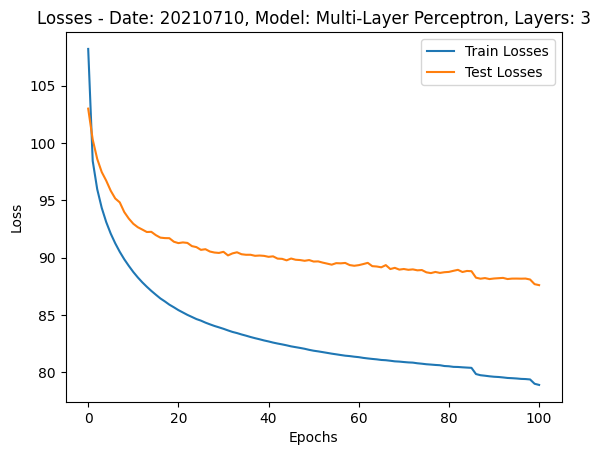

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 21219
Epoch: 000, LR: 0.001000, Train Loss: 92.855098, Test Loss: 73.627977. Train R2: 0.1572446, Test R2: 0.1538524, Train pR2: -0.7501045, Test pR2: -0.7433785
Epoch: 050, LR: 0.001000, Train Loss: 60.779401, Test Loss: 64.824555. Train R2: 0.3008079, Test R2: 0.2549904, Train pR2: -0.6768886, Test pR2: -0.7335179
Epoch: 100, LR: 0.000512, Train Loss: 56.149220, Test Loss: 61.817207. Train R2: 0.3531418, Test R2: 0.2895561, Train pR2: -0.2047672, Test pR2: -0.2951553
Time to train model: 356.48351669311523


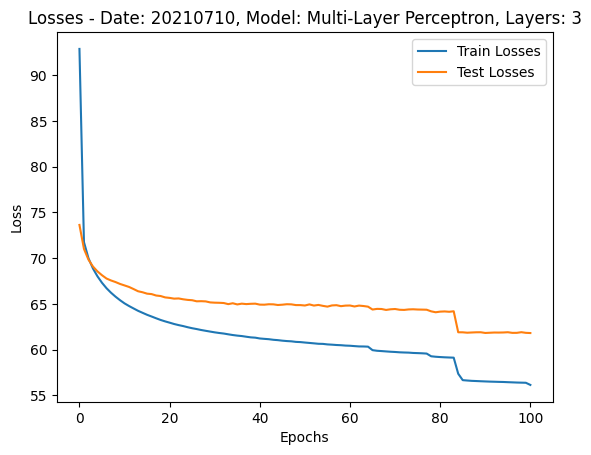

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 21219
Epoch: 000, LR: 0.001000, Train Loss: 112.288724, Test Loss: 93.580506. Train R2: 0.2557435, Test R2: 0.2518179, Train pR2: -2.8606777, Test pR2: -2.8608141
Epoch: 050, LR: 0.001000, Train Loss: 70.497645, Test Loss: 77.032375. Train R2: 0.4356834, Test R2: 0.3842173, Train pR2: -1.0171613, Test pR2: -1.0665649
Epoch: 100, LR: 0.000512, Train Loss: 66.812168, Test Loss: 76.600977. Train R2: 0.4615950, Test R2: 0.3876244, Train pR2: -1.0160985, Test pR2: -1.0865113
Time to train model: 346.1719641685486


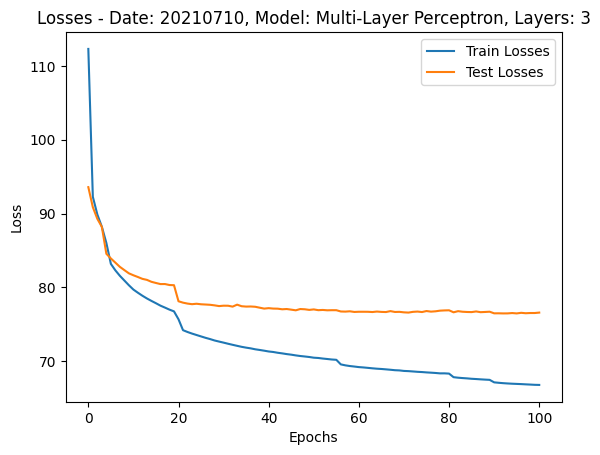

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19637
Epoch: 000, LR: 0.001000, Train Loss: 185.401095, Test Loss: 167.062786. Train R2: -0.1007056, Test R2: -0.0904649, Train pR2: -4.6935935, Test pR2: -4.5497723
Epoch: 050, LR: 0.001000, Train Loss: 84.905821, Test Loss: 93.529306. Train R2: 0.4403344, Test R2: 0.3894905, Train pR2: -1.2425423, Test pR2: -1.2945745
Epoch: 100, LR: 0.000640, Train Loss: 79.427710, Test Loss: 92.016624. Train R2: 0.4738687, Test R2: 0.3993574, Train pR2: -1.2360520, Test pR2: -1.3126540
Time to train model: 224.2934021949768


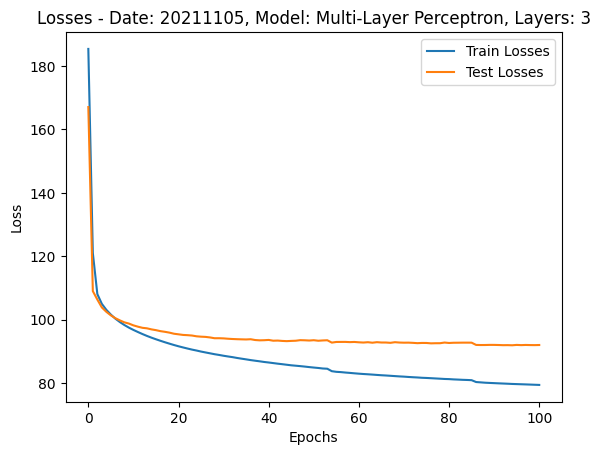

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19637
Epoch: 000, LR: 0.001000, Train Loss: 78.635763, Test Loss: 70.529512. Train R2: 0.2064123, Test R2: 0.1987856, Train pR2: -0.6508780, Test pR2: -0.6533966
Epoch: 050, LR: 0.001000, Train Loss: 54.241543, Test Loss: 59.035828. Train R2: 0.3835231, Test R2: 0.3293334, Train pR2: -0.2256271, Test pR2: -0.2950641
Epoch: 100, LR: 0.000640, Train Loss: 51.129862, Test Loss: 57.867520. Train R2: 0.4182749, Test R2: 0.3426011, Train pR2: -0.2137939, Test pR2: -0.3020717
Time to train model: 222.64667582511902


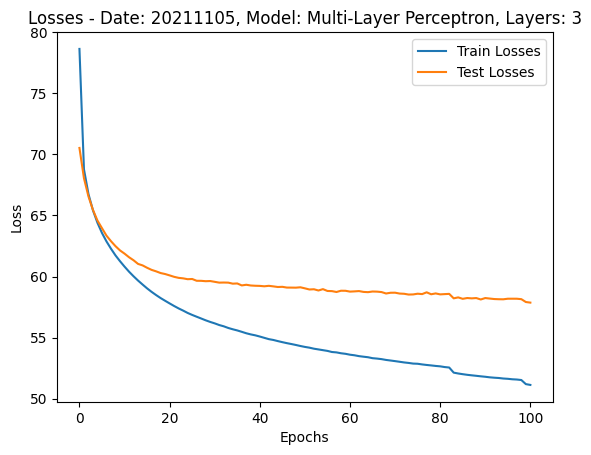

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19863
Epoch: 000, LR: 0.001000, Train Loss: 102.935531, Test Loss: 75.198362. Train R2: 0.2074167, Test R2: 0.2088636, Train pR2: -0.9044461, Test pR2: -0.9033194
Epoch: 050, LR: 0.001000, Train Loss: 59.554949, Test Loss: 64.993019. Train R2: 0.3785364, Test R2: 0.3162295, Train pR2: -0.8224654, Test pR2: -0.8687660
Epoch: 100, LR: 0.000640, Train Loss: 56.113153, Test Loss: 63.987849. Train R2: 0.4108718, Test R2: 0.3267994, Train pR2: -0.7376376, Test pR2: -0.8007572
Time to train model: 224.9828667640686


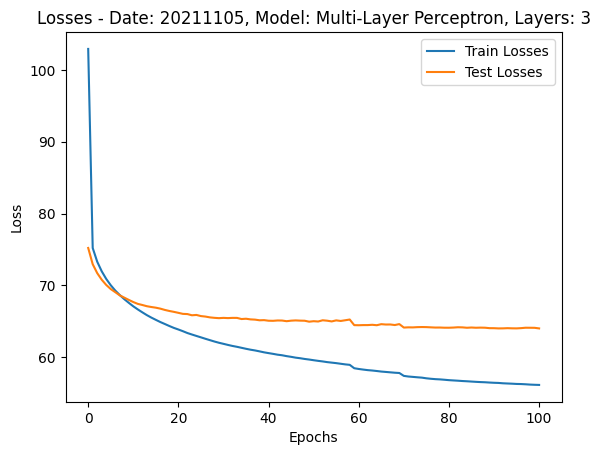

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20767
Epoch: 000, LR: 0.001000, Train Loss: 140.178216, Test Loss: 119.766214. Train R2: 0.0086128, Test R2: 0.0110909, Train pR2: -3.4441876, Test pR2: -3.4474597
Epoch: 050, LR: 0.001000, Train Loss: 79.216226, Test Loss: 83.166501. Train R2: 0.3460118, Test R2: 0.3135069, Train pR2: -0.2153624, Test pR2: -0.2562194
Epoch: 100, LR: 0.000800, Train Loss: 76.007454, Test Loss: 82.051261. Train R2: 0.3690151, Test R2: 0.3225760, Train pR2: -0.2291013, Test pR2: -0.2908200
Time to train model: 228.10804271697998


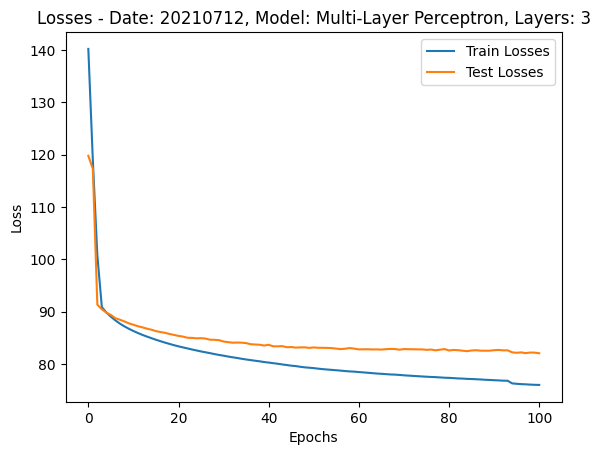

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20767
Epoch: 000, LR: 0.001000, Train Loss: 147.772365, Test Loss: 138.043658. Train R2: 0.0244588, Test R2: 0.0229522, Train pR2: -2.9662979, Test pR2: -2.9747279
Epoch: 050, LR: 0.001000, Train Loss: 78.143771, Test Loss: 83.224929. Train R2: 0.4444486, Test R2: 0.4107298, Train pR2: -0.2005840, Test pR2: -0.2580848
Epoch: 100, LR: 0.001000, Train Loss: 75.051829, Test Loss: 82.231853. Train R2: 0.4633126, Test R2: 0.4178605, Train pR2: -0.1984811, Test pR2: -0.2756177
Time to train model: 226.74297046661377


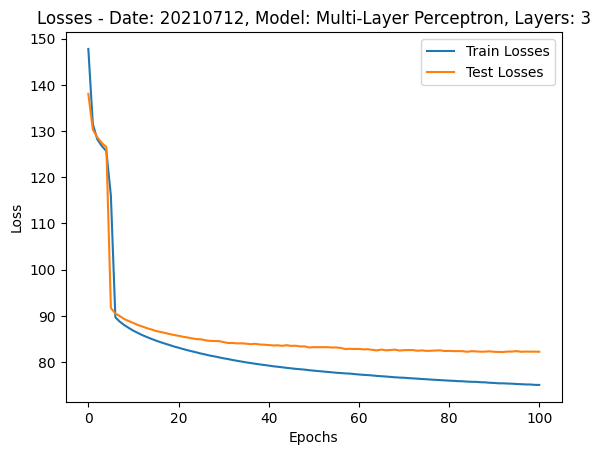

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20880
Epoch: 000, LR: 0.001000, Train Loss: 215.463243, Test Loss: 184.965841. Train R2: 0.0165001, Test R2: 0.0093693, Train pR2: -3.1132545, Test pR2: -3.0925524
Epoch: 050, LR: 0.001000, Train Loss: 110.619496, Test Loss: 114.514617. Train R2: 0.4202415, Test R2: 0.3870962, Train pR2: -0.0093624, Test pR2: -0.0399029
Epoch: 100, LR: 0.001000, Train Loss: 106.052808, Test Loss: 113.090168. Train R2: 0.4412111, Test R2: 0.3946855, Train pR2: -0.0157526, Test pR2: -0.0711274
Time to train model: 223.7118055820465


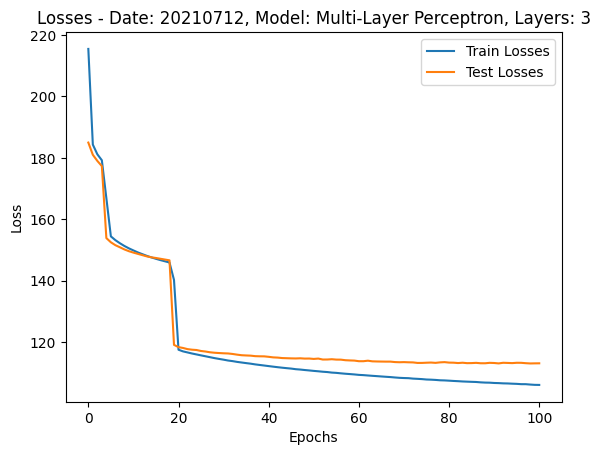

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19072
Epoch: 000, LR: 0.001000, Train Loss: 92.198727, Test Loss: 77.638475. Train R2: 0.2244202, Test R2: 0.2083754, Train pR2: -1.4649850, Test pR2: -1.4576271
Epoch: 050, LR: 0.001000, Train Loss: 58.244992, Test Loss: 64.540301. Train R2: 0.4014679, Test R2: 0.3418336, Train pR2: -0.3722856, Test pR2: -0.4187146
Epoch: 100, LR: 0.000512, Train Loss: 53.270434, Test Loss: 63.391153. Train R2: 0.4529656, Test R2: 0.3537093, Train pR2: -0.3572487, Test pR2: -0.4441124
Time to train model: 107.39736294746399


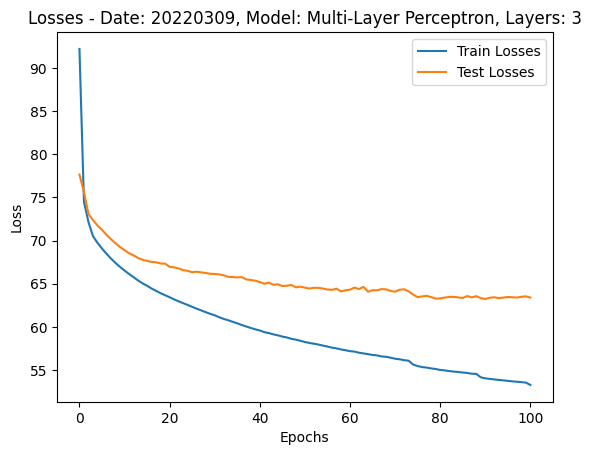

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19072
Epoch: 000, LR: 0.001000, Train Loss: 131.759713, Test Loss: 112.827735. Train R2: 0.1205196, Test R2: 0.1109377, Train pR2: -3.7840540, Test pR2: -3.7888417
Epoch: 050, LR: 0.001000, Train Loss: 66.585545, Test Loss: 74.282931. Train R2: 0.4701759, Test R2: 0.4144794, Train pR2: 0.0472713, Test pR2: 0.0018156
Epoch: 100, LR: 0.000640, Train Loss: 60.717171, Test Loss: 73.432200. Train R2: 0.5119658, Test R2: 0.4213372, Train pR2: 0.0506573, Test pR2: -0.0505816
Time to train model: 106.5324034690857


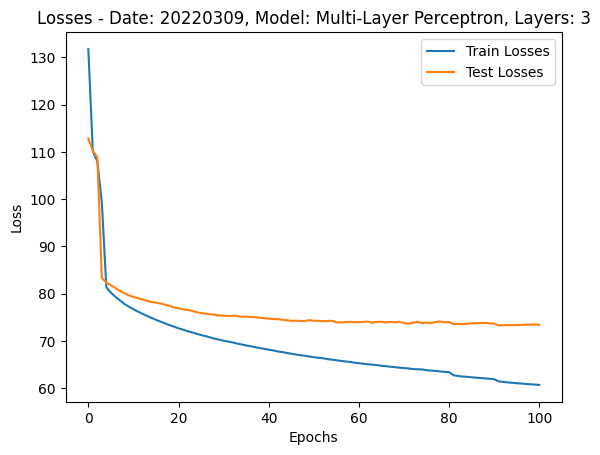

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 19072
Epoch: 000, LR: 0.001000, Train Loss: 158.139168, Test Loss: 129.800205. Train R2: -0.2275982, Test R2: -0.2403515, Train pR2: -9.0393505, Test pR2: -9.1290598
Epoch: 050, LR: 0.001000, Train Loss: 60.446154, Test Loss: 67.160040. Train R2: 0.4300047, Test R2: 0.3589745, Train pR2: 0.2127820, Test pR2: 0.1177394
Epoch: 100, LR: 0.000640, Train Loss: 55.495164, Test Loss: 66.178563. Train R2: 0.4690851, Test R2: 0.3686749, Train pR2: 0.2422407, Test pR2: 0.1354987
Time to train model: 107.55517077445984


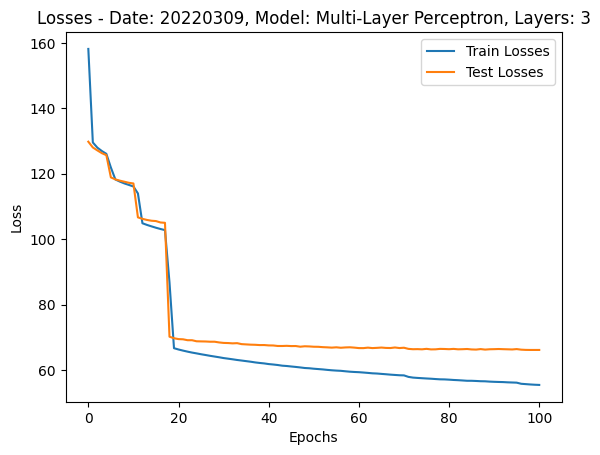

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20880
Epoch: 000, LR: 0.001000, Train Loss: 65.855841, Test Loss: 60.866750. Train R2: 0.3063404, Test R2: 0.2958063, Train pR2: -2.4878571, Test pR2: -2.5291908
Epoch: 050, LR: 0.001000, Train Loss: 44.270065, Test Loss: 48.746517. Train R2: 0.4890298, Test R2: 0.4361016, Train pR2: -0.8438925, Test pR2: -0.9604445
Epoch: 100, LR: 0.000512, Train Loss: 41.638457, Test Loss: 48.501701. Train R2: 0.5152008, Test R2: 0.4388877, Train pR2: -0.8099480, Test pR2: -0.9528337
Time to train model: 344.54183173179626


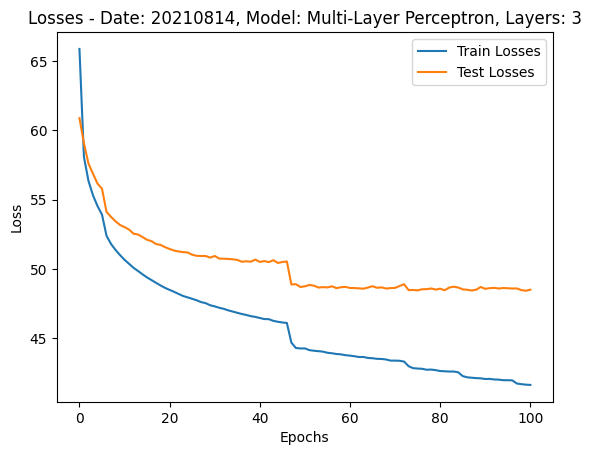

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20880
Epoch: 000, LR: 0.001000, Train Loss: 109.155580, Test Loss: 99.407824. Train R2: 0.3575072, Test R2: 0.3595258, Train pR2: -1.8920665, Test pR2: -1.9027942
Epoch: 050, LR: 0.000800, Train Loss: 76.918249, Test Loss: 85.056023. Train R2: 0.4909151, Test R2: 0.4520016, Train pR2: -1.3931084, Test pR2: -1.5249534
Epoch: 100, LR: 0.000512, Train Loss: 73.387682, Test Loss: 83.966740. Train R2: 0.5153220, Test R2: 0.4589888, Train pR2: -1.1062784, Test pR2: -1.2723315
Time to train model: 343.09769010543823


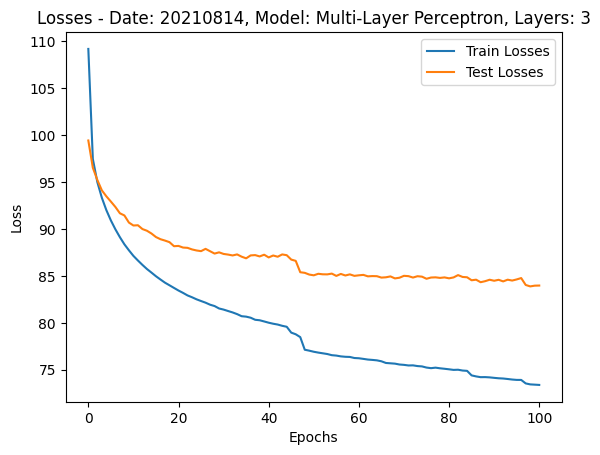

Multi-Layer Perceptron, full dataset
Num Layers: 3, Hidden Layer Dimensionality: 112, Total Parameters: 20993
Epoch: 000, LR: 0.001000, Train Loss: 124.713271, Test Loss: 107.129006. Train R2: 0.0888636, Test R2: 0.0831712, Train pR2: -3.0408590, Test pR2: -3.0827963
Epoch: 050, LR: 0.001000, Train Loss: 59.611118, Test Loss: 66.008405. Train R2: 0.4943024, Test R2: 0.4352153, Train pR2: -0.6056354, Test pR2: -0.8138509
Epoch: 100, LR: 0.000512, Train Loss: 56.325786, Test Loss: 65.267704. Train R2: 0.5183382, Test R2: 0.4415036, Train pR2: -0.4059461, Test pR2: -0.6413323
Time to train model: 341.2147595882416


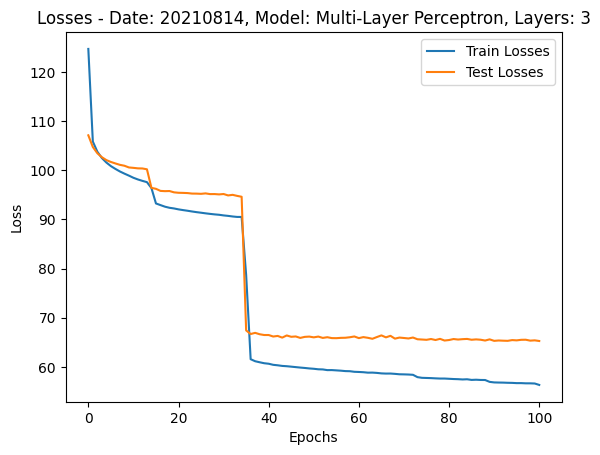

In [21]:
mlp_models_dict = {}
for date in tcnn_dataset_dict_split.keys():
    mlp_models_dict[date] = {}
    for split_num in ['0','1','2']:
        model = visualization.plot_losses_MLP(dataset_dict_split[date]['Joint Angles'][split_num]['Full'],
                                              loader_dict_split[date]['Joint Angles'][split_num]['Train'],
                                              loader_dict_split[date]['Joint Angles'][split_num]['Test'],
                                              0.001, 3, add_relu = True, adapt_lr = True, save = True,
                                              numepochs = 101, split = 'SplitNeurons',loss_type = 'mse_loss',
                                              restraint_type='fullyrestrained')
        mlp_models_dict[date][split_num] = model

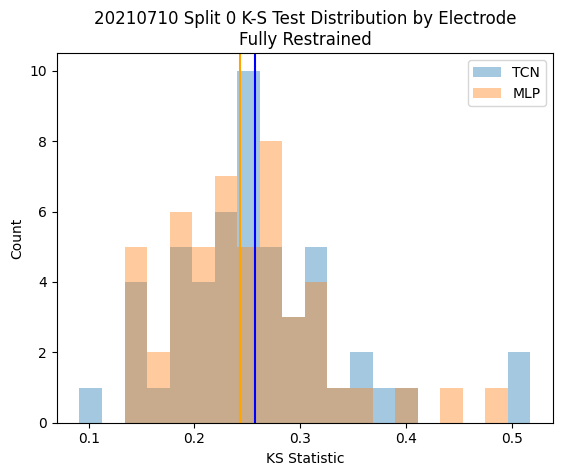

Mean KS TCN: 0.2569140553417628, Mean KS MLP: 0.24338242185992406


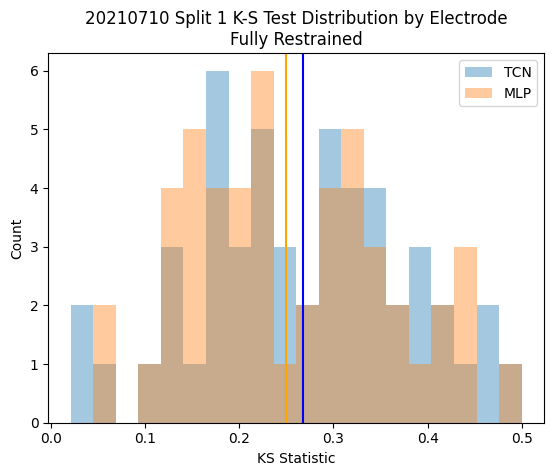

Mean KS TCN: 0.26805204324720544, Mean KS MLP: 0.24932597464892794


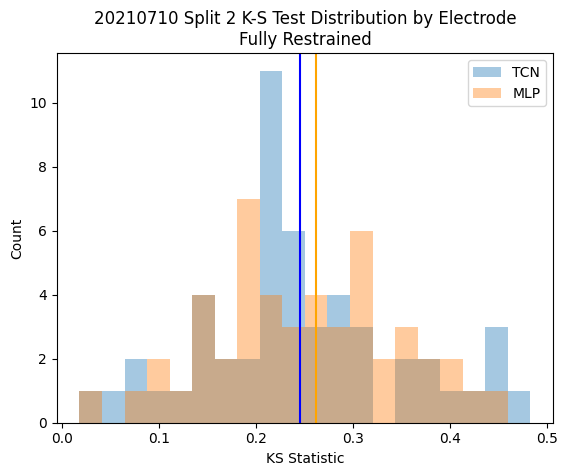

Mean KS TCN: 0.2454059006780282, Mean KS MLP: 0.26170929520932


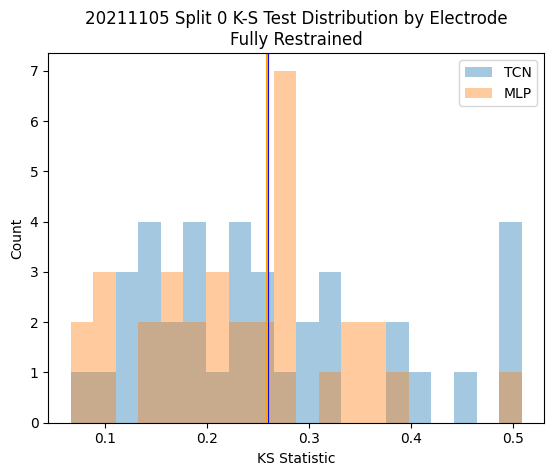

Mean KS TCN: 0.25950513894175864, Mean KS MLP: 0.2586779734891208


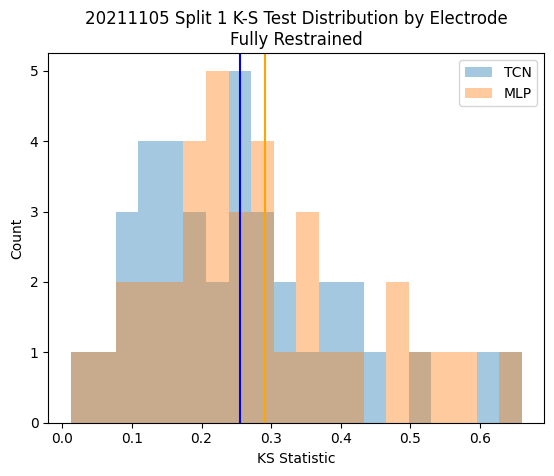

Mean KS TCN: 0.2547696992767416, Mean KS MLP: 0.29053384973599994


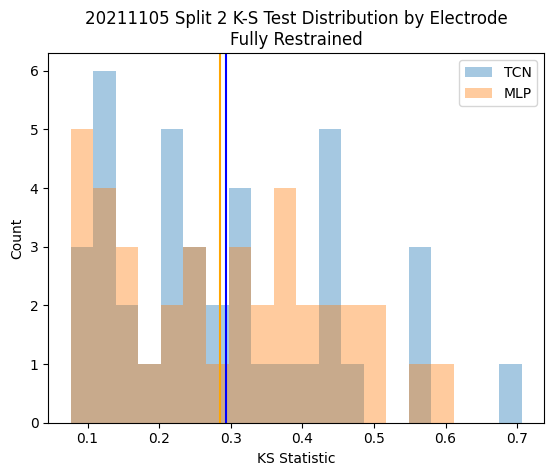

Mean KS TCN: 0.2926796677500903, Mean KS MLP: 0.2844597756183554


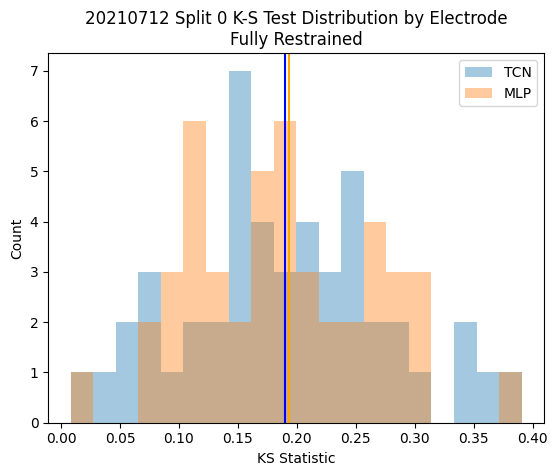

Mean KS TCN: 0.18984716811507343, Mean KS MLP: 0.19298720516846232


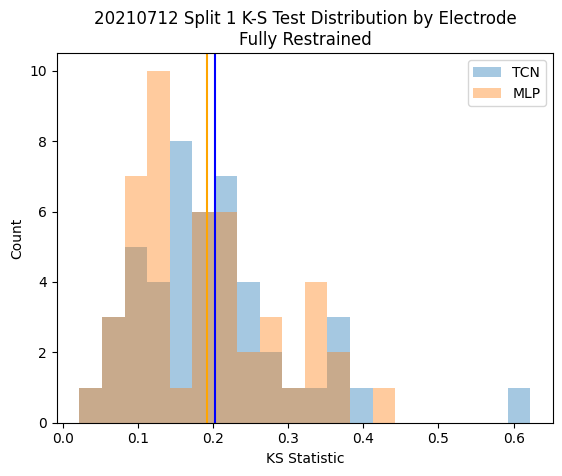

Mean KS TCN: 0.20203476176206175, Mean KS MLP: 0.19151342344455882


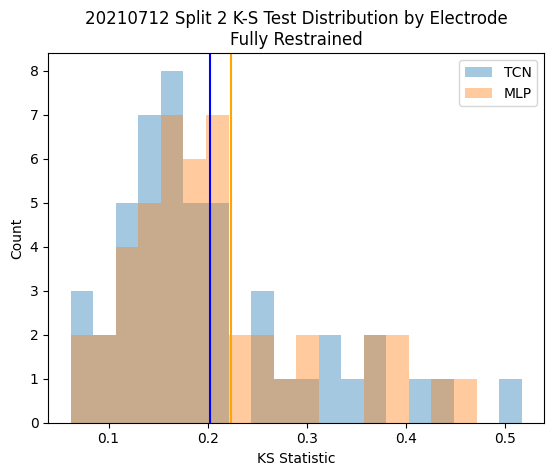

Mean KS TCN: 0.20198063380281686, Mean KS MLP: 0.22334134388841767


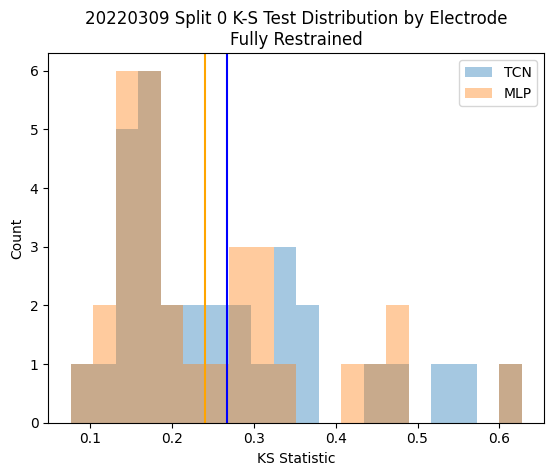

Mean KS TCN: 0.2669910714285714, Mean KS MLP: 0.2402310017271157


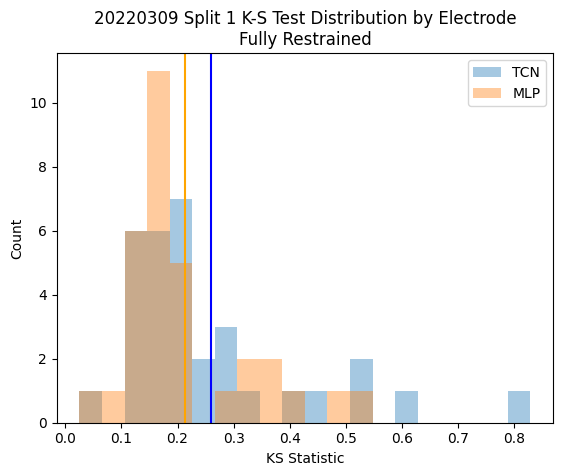

Mean KS TCN: 0.26031249999999995, Mean KS MLP: 0.2140544041450777


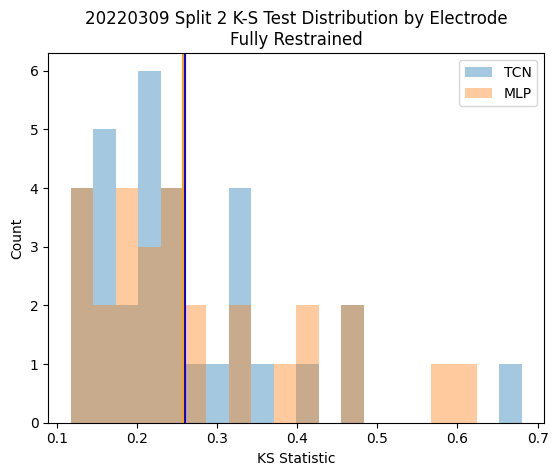

Mean KS TCN: 0.259625, Mean KS MLP: 0.2577540299366724


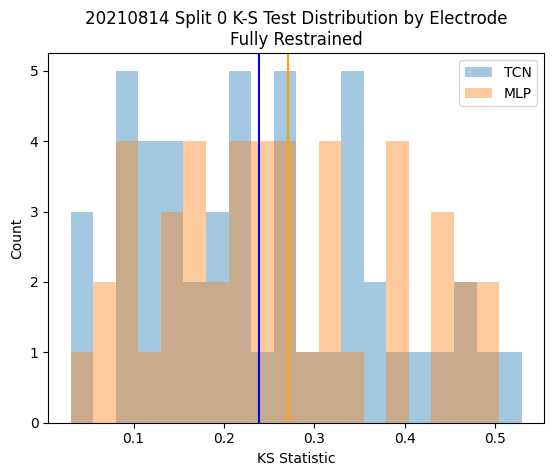

Mean KS TCN: 0.23878504672897197, Mean KS MLP: 0.2714171899896898


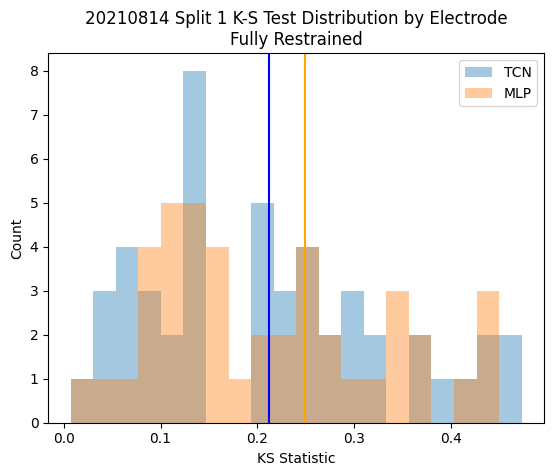

Mean KS TCN: 0.2121612149532711, Mean KS MLP: 0.24865263848533134


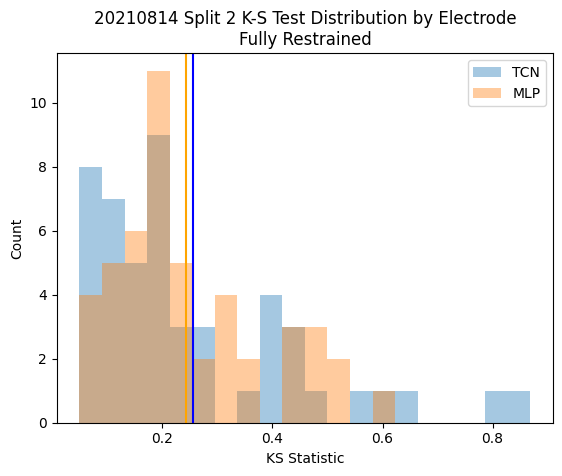

Mean KS TCN: 0.25539958039290483, Mean KS MLP: 0.24356661776154834


In [63]:
for date in tcn_models_dict.keys():
    for split_num in tcn_models_dict[date].keys():
        model_1_name = 'TCN'
        model1 = tcn_models_dict[date][split_num]
        dataset1 = tcnn_dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader1 = tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Test']
        conv1 = True
        model_2_name = 'MLP'
        model2 = mlp_models_dict[date][split_num]
        dataset2 = dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader2 = loader_dict_split[date]['Joint Angles'][split_num]['Test']
        conv2 = False
        mean_model_1, mean_model_2 = visualization.plot_and_compare_ks(model_1_name, model1, dataset1, test_loader1, conv1, model_2_name, model2, dataset2, test_loader2, conv2, 'Fully Restrained', bins = 20)
        print('Mean KS TCN: {}, Mean KS MLP: {}'.format(mean_model_1, mean_model_2))

TCN average pR2: -0.05527348443865776
MLP average pR2: -0.0013485457748174667


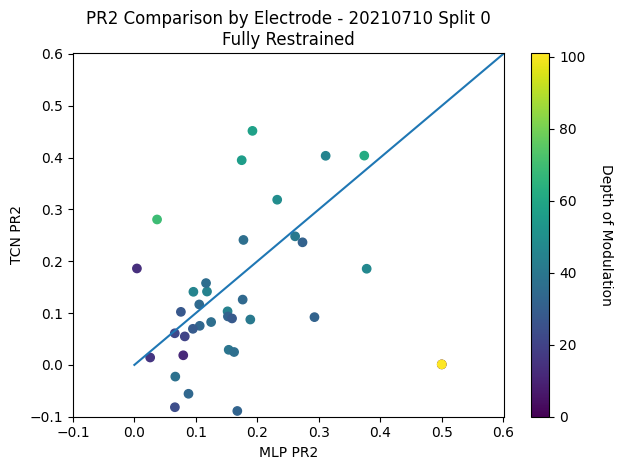

TCN average pR2: -0.6739354133605957
MLP average pR2: -0.29515528678894043


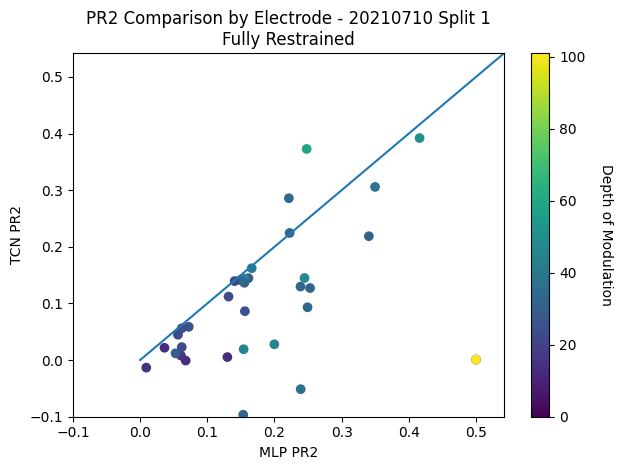

TCN average pR2: -0.9429128170013428
MLP average pR2: -1.086511254310608


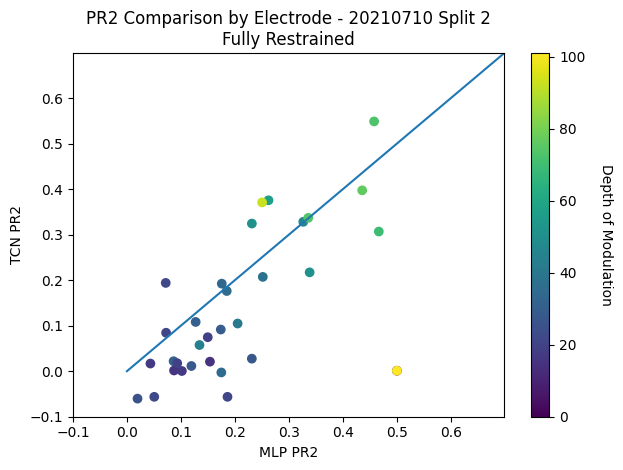

TCN average pR2: -1.1549450159072876
MLP average pR2: -1.3126540184020996


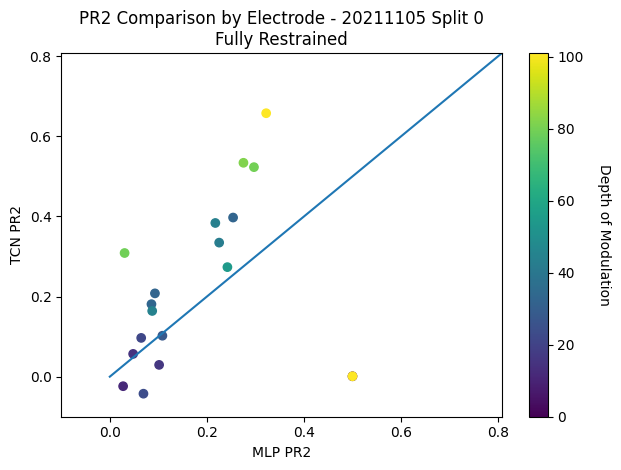

TCN average pR2: -0.9450549483299255
MLP average pR2: -0.3020716905593872


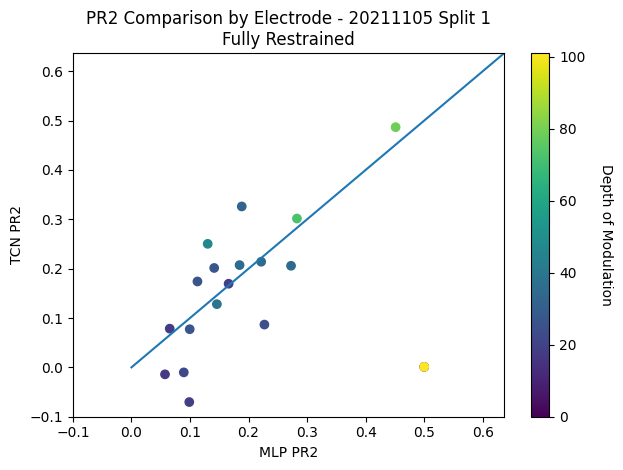

TCN average pR2: -1.3222506046295166
MLP average pR2: -0.8007571697235107


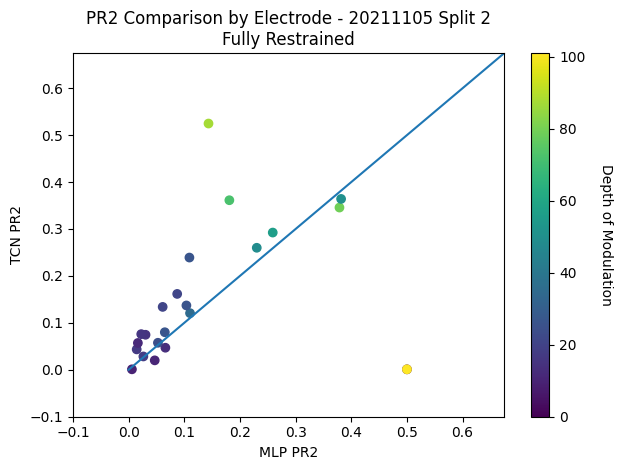

TCN average pR2: -0.24741555750370026
MLP average pR2: -0.29082003235816956


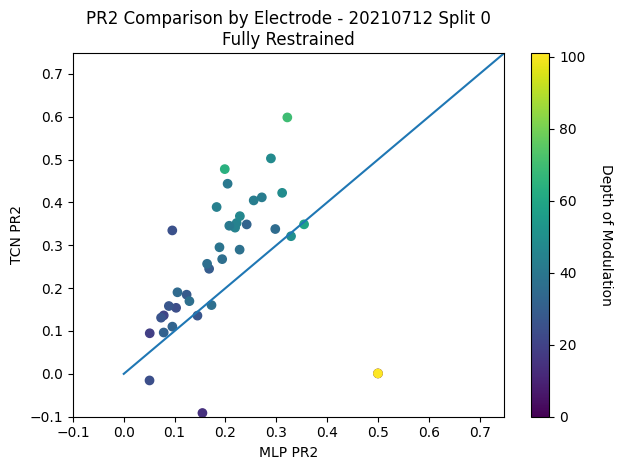

TCN average pR2: -0.6173684000968933
MLP average pR2: -0.27561765909194946


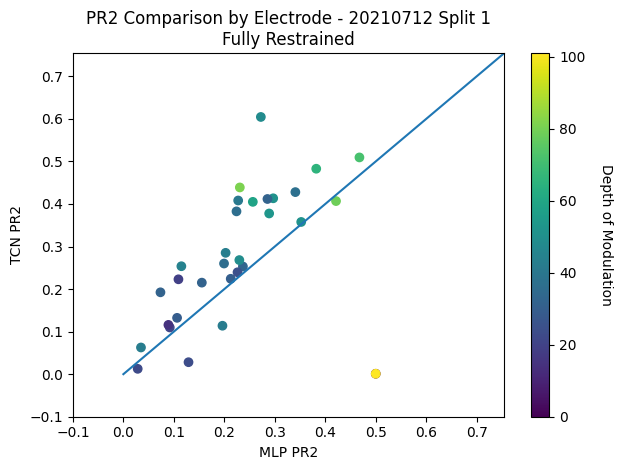

TCN average pR2: -0.0934852585196495
MLP average pR2: -0.07112741470336914


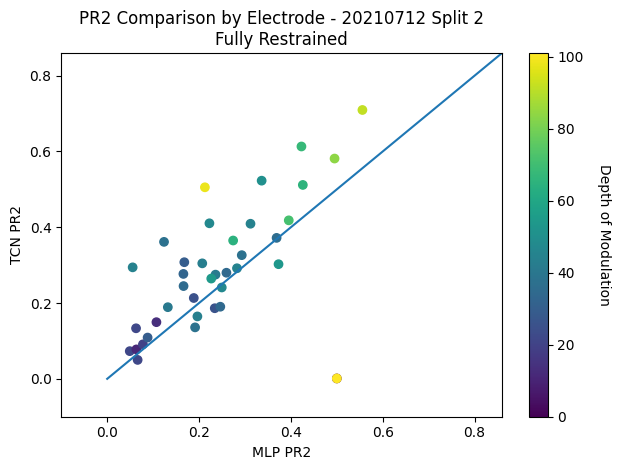

TCN average pR2: -0.42058491706848145
MLP average pR2: -0.4441124200820923


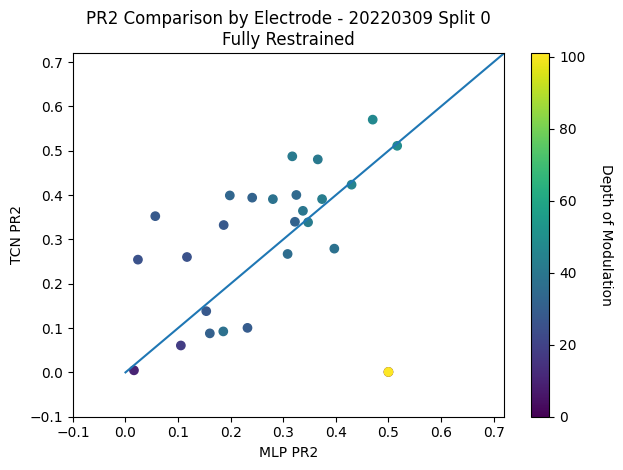

TCN average pR2: -0.7392050623893738
MLP average pR2: -0.05058161914348602


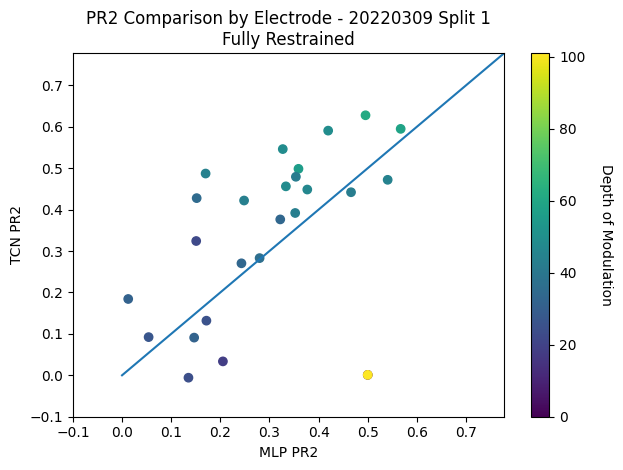

TCN average pR2: -0.20873767137527466
MLP average pR2: 0.13549870252609253


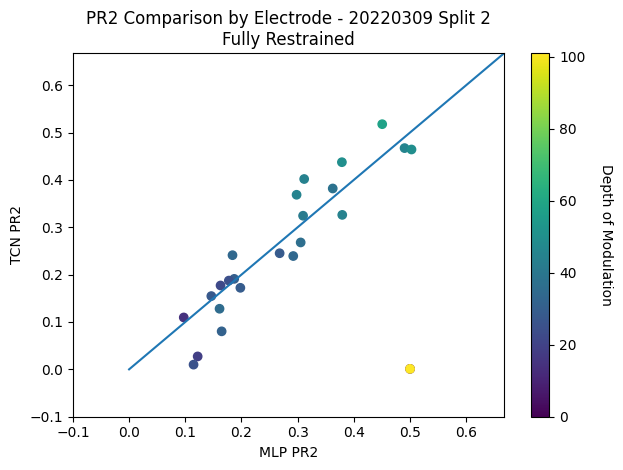

TCN average pR2: -1.890099048614502
MLP average pR2: -0.9528336524963379


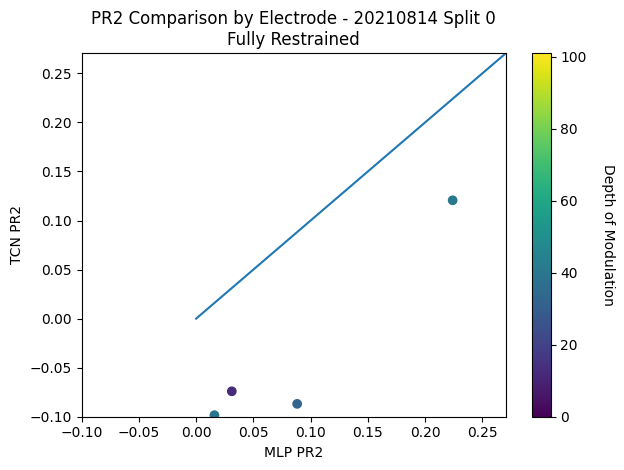

TCN average pR2: -1.1390024423599243
MLP average pR2: -1.2723314762115479


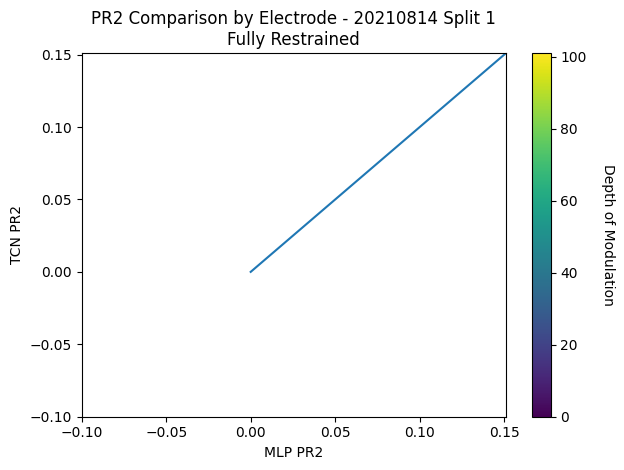

TCN average pR2: -2.3847923278808594
MLP average pR2: -0.6413323283195496


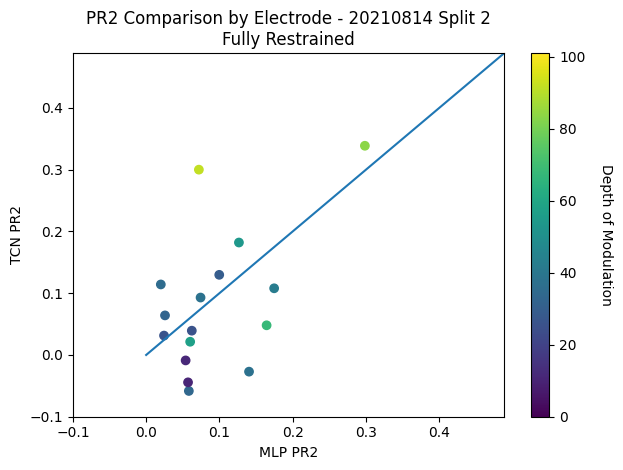

In [82]:
for date in tcn_models_dict.keys():
    for split_num in tcn_models_dict[date].keys():
        model_1_name = 'TCN'
        model1 = tcn_models_dict[date][split_num]
        dataset1 = tcnn_dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader1 = tcnn_loader_dict_split[date]['Joint Angles'][split_num]['Test']
        conv1 = True
        model_2_name = 'MLP'
        model2 = mlp_models_dict[date][split_num]
        conv2 = False
        dataset2 = dataset_dict_split[date]['Joint Angles'][split_num]['Full']
        test_loader2 = loader_dict_split[date]['Joint Angles'][split_num]['Test']
        visualization.compare_pr2_plots(model_1_name, model1, dataset1, test_loader1, conv1, model_2_name, model2, dataset2, test_loader2, conv2, 'Fully Restrained', exclude_bad_neurons = True)
        # print('Mean KS TCN: {}, Mean KS MLP: {}'.format(mean_model_1, mean_model_2))